# Heart Disease Analysis

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [31]:
dataset_url = 'https://www.kaggle.com/ronitf/heart-disease-uci' 

In [32]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: akash125
Your Kaggle Key: ········


100%|██████████| 3.40k/3.40k [00:00<00:00, 788kB/s]

The dataset has been downloaded and extracted.

In [33]:
data_dir = './heart-disease-uci'

In [34]:
import os
os.listdir(data_dir)

['heart.csv']

Let us save and upload our work to Jovian before continuing.

In [35]:
project_name = "heart-disease-analysis"

In [36]:
!pip install jovian --upgrade -q

In [37]:
import jovian

In [38]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/heart-disease-analysis


<IPython.core.display.Javascript object>

In [39]:
!pip install pandas 
!pip install matplotlib 
!pip install seaborn

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
heart_df = pd.read_csv(data_dir + '/heart.csv')

In [42]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
heart_df.shape

(303, 14)

In [44]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
Age = len(heart_df.age.unique())

In [46]:
Age

41

There are 41 Unique ages, suffering from heart disease

In [47]:
heart_df['sex'] = heart_df['sex'].map({1 : 'Male', 0 : 'Female'})

In [49]:
heart_df['fbs'] = heart_df['fbs'].map({1 : 'True', 0 : 'False'})

In [51]:
heart_df['exang'] = heart_df['exang'].map({1 : 'Yes', 0 : 'No'})

In [75]:
heart_df.rename(columns = {'cp':'chest_pain', 'trestbps':'resting_blood_pressure', 'chol':'serum_cholestoral', 'fbs':'fasting_blood_sugar', 'restecg':'resting_electrocardiographic', 'thalach':'maximum_heart_rate'}, inplace = True)

In [76]:
heart_df

,age,sex,chest pain,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic,maximum heart rate,exang,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,True,0,150,No,2.3,0,0,1,1
1,37,Male,2,130,250,False,1,187,No,3.5,0,0,2,1
2,41,Female,1,130,204,False,0,172,No,1.4,2,0,2,1
3,56,Male,1,120,236,False,1,178,No,0.8,2,0,2,1
4,57,Female,0,120,354,False,1,163,Yes,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140,241,False,1,123,Yes,0.2,1,0,3,0
299,45,Male,3,110,264,False,1,132,No,1.2,1,0,3,0
300,68,Male,0,144,193,True,1,141,No,3.4,1,2,3,0
301,57,Male,0,130,131,False,1,115,Yes,1.2,1,1,3,0


In [77]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    object 
 2   chest pain                    303 non-null    int64  
 3   resting blood pressure        303 non-null    int64  
 4   serum cholestoral             303 non-null    int64  
 5   fasting blood sugar           303 non-null    object 
 6   resting electrocardiographic  303 non-null    int64  
 7   maximum heart rate            303 non-null    int64  
 8   exang                         303 non-null    object 
 9   oldpeak                       303 non-null    float64
 10  slope                         303 non-null    int64  
 11  ca                            303 non-null    int64  
 12  thal                          303 non-null    int64  
 13  targe

In [64]:
heart_df['chest pain'].max()

3

Third type is the maximum type in chest pain

In [66]:
heart_df['serum cholestoral'].max()

564

Among the data **564** is the maximum **Serum Cholestral** observed

In [67]:
heart_df['maximum heart rate'].max()

202

202 is the maximum heart rate observed

In [68]:
heart_df['age'].min()

29

among the data 29 is the minimum age suffering from a herat disease

In [69]:
heart40 = heart_df.head(40)

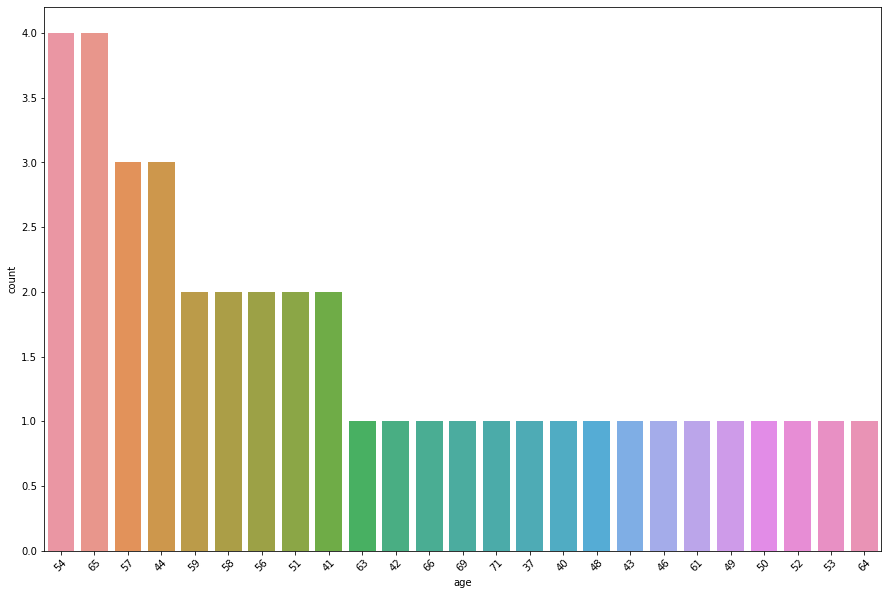

In [72]:
plt.figure(figsize=(15, 10));
sns.countplot(x="age", data=heart40, order = heart40['age'].value_counts().index);
plt.xticks(rotation=45);

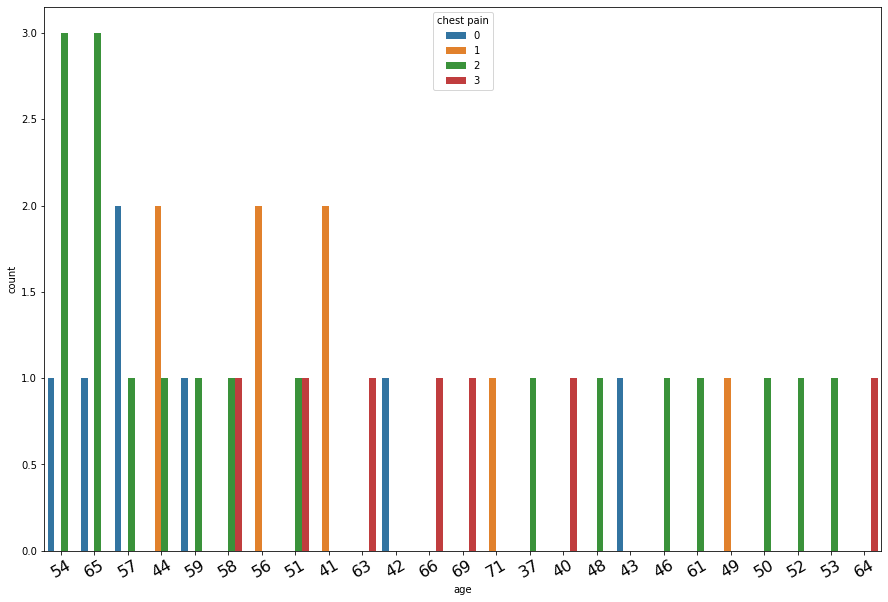

In [83]:
plt.figure(figsize=(15, 10));
sns.countplot(x="age", data=heart40, hue='chest pain', order=heart40.age.value_counts().index);
plt.xticks(size=16, rotation=30);

In [79]:
import jovian

In [80]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/heart-disease-analysis


<IPython.core.display.Javascript object>

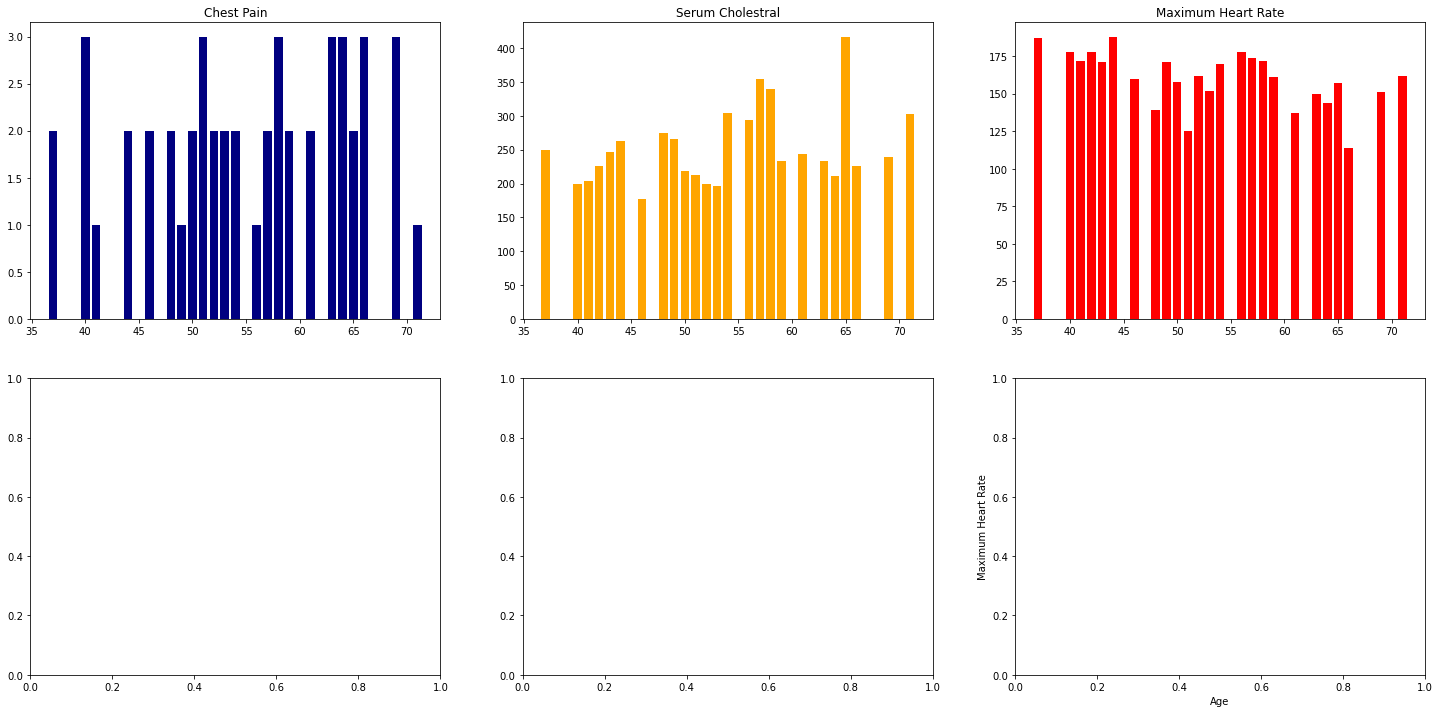

In [94]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12));
axes[0,0].set_title("Chest Pain");
axes[0,0].bar(heart40.age, heart40['chest pain'], color = 'navy');
plt.xlabel('Age'); #X-axis
plt.ylabel('Chest Pain'); #Y-axis

axes[0,1].set_title("Serum Cholestral");
axes[0,1].bar(heart40.age, heart40['serum cholestoral'], color = 'orange');
plt.xlabel('Age'); #X-axis
plt.ylabel('Serum Cholestral'); #Y-axis

axes[0,2].set_title("Maximum Heart Rate");
axes[0,2].bar(heart40.age, heart40['maximum heart rate'], color = 'red');
plt.xlabel('Age'); #X-axis
plt.ylabel('Maximum Heart Rate'); #Y-axis


In [95]:
heart_rate = heart40.groupby(by=['maximum heart rate'])['age'].sum()
heart_rate = heart_rate.reset_index()
heart_rate = heart_rate.sort_values(by=['age'], ascending=False)

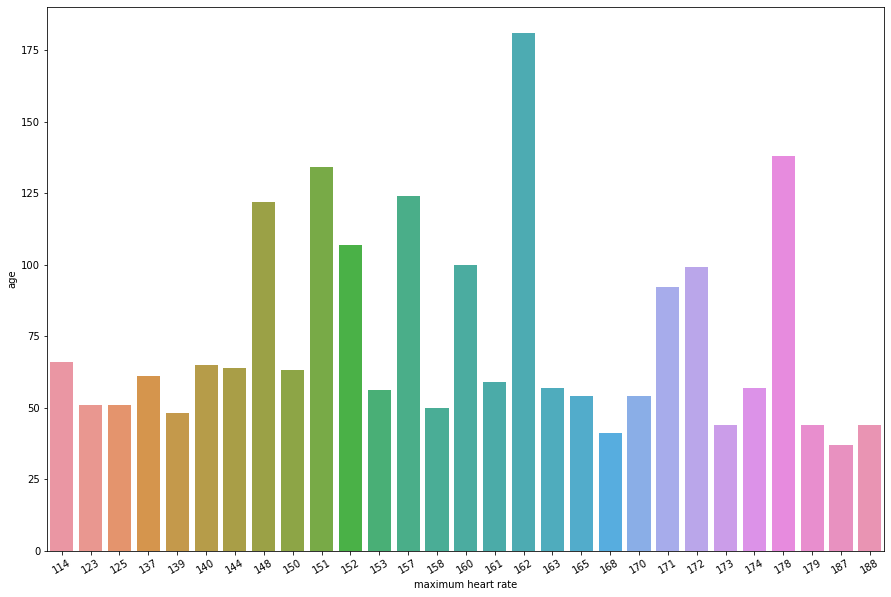

In [97]:
plt.figure(figsize=(15, 10));
sns.barplot(x="maximum heart rate", y="age", data=heart_rate);
plt.xticks(rotation=30);

In [105]:
count = heart40.groupby('age').count()

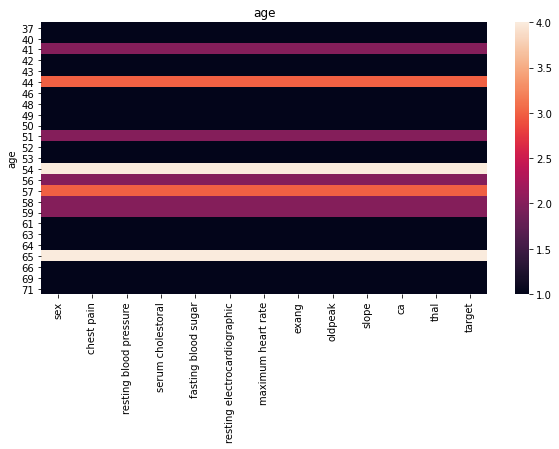

In [106]:
plt.figure(figsize=(10,5))
plt.title("age")
sns.heatmap(count);

In [107]:
import jovian

In [109]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/a-malhotraakash/heart-disease-analysis


<IPython.core.display.Javascript object>